In [1]:
import torch

d:\soft2\miniconda3\envs\mxfont2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torch import nn

## dataset

In [20]:
from datasets import *

In [4]:
fontfile=r'E:\Documents\重要文件\高协平\data\cao.ttf'

In [3]:
get_filtered_chars(fontfile)  # 返回ttf可用的字体,原理是：1.得到可用字体 2.将字体画出来，如果是全白色，则不要

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '¤',
 '§',
 '¨',
 '°',
 '±',
 '·',
 '×',
 'à',
 'á',
 'è',
 'é',
 'ê',
 'ì',
 'í',
 'ò',
 'ó',
 '÷',
 'ù',
 'ú',
 'ü',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U

In [5]:

def load_data_list(data_dir, char_filter=None):
    font_paths = sorted(Path(data_dir).glob("*.ttf"))

    key_font_dict = {}
    key_char_dict = {}

    for font_path in font_paths:
        font = read_font(font_path)
        key_font_dict[font_path.stem] = font

        with open(str(font_path).replace(".ttf", ".txt"), encoding='utf-8') as f:
            chars = f.read()

        if char_filter is not None:
            chars = set(chars).intersection(char_filter)
        key_char_dict[font_path.stem] = list(chars)

    return key_font_dict, key_char_dict

In [7]:
from pathlib import Path
load_data_list(r'data\ttfs\mao_test')  # 每个字体的列表，转换为字典格式

({'cao': <PIL.ImageFont.FreeTypeFont at 0x1da28ec2cd0>,
  'maotiziti': <PIL.ImageFont.FreeTypeFont at 0x1da28d5dc10>},
 {'cao': ['!',
   '"',
   '#',
   '$',
   '%',
   '&',
   "'",
   '(',
   ')',
   '*',
   '+',
   ',',
   '-',
   '.',
   '/',
   '0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   ':',
   ';',
   '<',
   '=',
   '>',
   '?',
   '@',
   'A',
   'B',
   'C',
   'D',
   'E',
   'F',
   'G',
   'H',
   'I',
   'J',
   'K',
   'L',
   'M',
   'N',
   'O',
   'P',
   'Q',
   'R',
   'S',
   'T',
   'U',
   'V',
   'W',
   'X',
   'Y',
   'Z',
   '[',
   '\\',
   ']',
   '^',
   '_',
   '`',
   'a',
   'b',
   'c',
   'd',
   'e',
   'f',
   'g',
   'h',
   'i',
   'j',
   'k',
   'l',
   'm',
   'n',
   'o',
   'p',
   'q',
   'r',
   's',
   't',
   'u',
   'v',
   'w',
   'x',
   'y',
   'z',
   '{',
   '|',
   '}',
   '~',
   '¤',
   '§',
   '¨',
   '°',
   '±',
   '·',
   '×',
   'à',
   'á',
   'è',
   'é',
   'ê',
   'ì',
   'í',
   'ò',
 

In [5]:
from sconf import Config, dump_args
cfg = Config(r'cfgs\train.yaml', default="cfgs/defaults.yaml",
                 colorize_modified_item=True)

In [6]:
import json
primals = json.load(open(cfg.primals))
decomposition = json.load(open(cfg.decomposition))
n_comps = len(primals)

In [7]:
from torchvision import transforms
def setup_transforms(cfg):
    if cfg.dset_aug.random_affine:
        aug_transform = [
            transforms.ToPILImage(),
            transforms.RandomAffine(
                degrees=10, translate=(0.03, 0.03), scale=(0.9, 1.1), shear=10, fillcolor=255
            )
        ]
    else:
        aug_transform = []

    tensorize_transform = [transforms.Resize((128, 128)), transforms.ToTensor()]
    if cfg.dset_aug.normalize:
        tensorize_transform.append(transforms.Normalize([0.5], [0.5]))
        cfg.g_args.dec.out = "tanh"

    trn_transform = transforms.Compose(aug_transform + tensorize_transform)
    val_transform = transforms.Compose(tensorize_transform)

    return trn_transform, val_transform

In [8]:
trn_transform, val_transform = setup_transforms(cfg)

In [86]:
trn_dset, trn_loader = get_trn_loader(cfg.dset.train,
                                        primals,
                                        decomposition,
                                        trn_transform,
                                        use_ddp=cfg.use_ddp,
                                        batch_size=cfg.batch_size,
                                        num_workers=cfg.n_workers,
                                        shuffle=True)

Initialized with the following parameters:


In [30]:
trn_dset.__getitem__(0)

{'trg_imgs': tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 'trg_decs': [85, 36],
 'trg_fids': tensor([0]),
 'trg_cids': tensor([254]),
 'style_imgs': tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]],
 
 
         [[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]],
 
 
         [[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1., 

In [32]:
k =dict()
for i in trn_loader:
    print(i)
    k = i
    break

{'trg_imgs': tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        ...,


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1.,

In [71]:
dset = TTFTrainDataset(
        data_dir=cfg.dset.train['data_dir'],
        primals=primals,
        decomposition=decomposition,
        transform=trn_transform,
        n_in_s=1, n_in_c=1
    )

Initialized with the following parameters:


In [72]:
dset.key_char_dict

{'cao': ['淆',
  '搽',
  '俾',
  '爹',
  '魃',
  '踩',
  '蚺',
  '积',
  '后',
  '痹',
  '选',
  '叙',
  '啜',
  '沛',
  '造',
  '囟',
  '馏',
  '莞',
  '伢',
  '目',
  '羌',
  '阋',
  '筏',
  '枋',
  '撑',
  '糟',
  '撤',
  '腠',
  '褛',
  '雀',
  '荇',
  '嫜',
  '媪',
  '哄',
  '怔',
  '稗',
  '齿',
  '价',
  '奚',
  '瞄',
  '逅',
  '涂',
  '浦',
  '舁',
  '麾',
  '谯',
  '瑰',
  '筮',
  '贻',
  '课',
  '她',
  '皴',
  '券',
  '丞',
  '铐',
  '庑',
  '坏',
  '瘁',
  '羼',
  '旁',
  '娌',
  '埘',
  '绨',
  '降',
  '鸭',
  '馁',
  '臼',
  '宦',
  '橐',
  '丐',
  '撩',
  '潦',
  '憧',
  '确',
  '孔',
  '貊',
  '崤',
  '尾',
  '烂',
  '禾',
  '棺',
  '澡',
  '蛀',
  '趑',
  '辎',
  '闼',
  '珂',
  '鹾',
  '爸',
  '菲',
  '趴',
  '酰',
  '呸',
  '鲟',
  '麇',
  '魇',
  '鲵',
  '者',
  '蚪',
  '梧',
  '咫',
  '移',
  '稃',
  '癀',
  '葫',
  '绍',
  '惬',
  '苕',
  '柞',
  '阁',
  '轭',
  '嫁',
  '雌',
  '赌',
  '宀',
  '擦',
  '暨',
  '椋',
  '肜',
  '屏',
  '暝',
  '缈',
  '竿',
  '亦',
  '禹',
  '潞',
  '炅',
  '湫',
  '栽',
  '椟',
  '棱',
  '砼',
  '荽',
  '虻',
  '岐',
  '占',
  '婿',
  '媳',
  '缶',
  '拼',
  '鸸',
  '瑭',

In [29]:
# 将字典保存为JSON文件
with open("key_char_dict.json", "w") as json_file:
    json.dump(dset.char_key_dict, json_file)

In [56]:
dset.chars.index('范')

4523

In [75]:
geta  = dset.__getitem__(4523)

In [51]:
trn_transform

Compose(
    Resize(size=(128, 128), interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=[0.5], std=[0.5])
)

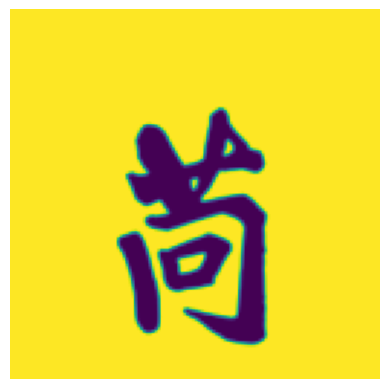

In [77]:
import matplotlib.pyplot as plt
reverse_transform = transforms.Compose([
    transforms.Normalize(mean=[-1], std=[2]),  # 反向归一化
    transforms.ToPILImage()
])
# 将张量转换回PIL图像
reconstructed_image = reverse_transform(geta['trg_imgs'])

# 显示图像
plt.imshow(reconstructed_image)
plt.axis('off')  # 关闭坐标轴
plt.show()

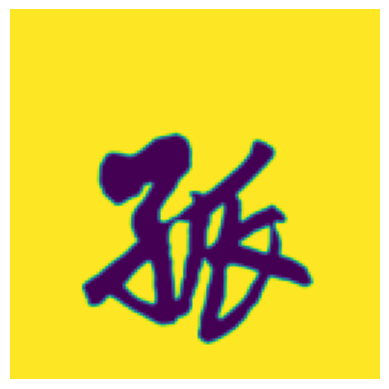

In [79]:
# 将张量转换回PIL图像
reconstructed_image = reverse_transform(geta['style_imgs'][0])

# 显示图像
plt.imshow(reconstructed_image)
plt.axis('off')  # 关闭坐标轴
plt.show()

In [73]:
[k for k in dset.char_key_dict['范'] if k != 'cao']

['maotiziti']

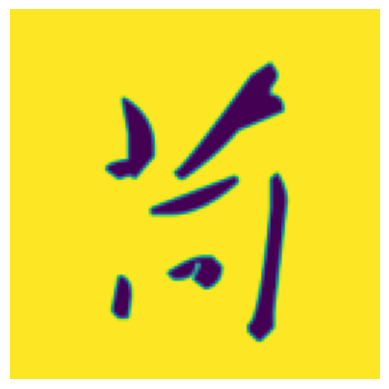

In [84]:
# 将张量转换回PIL图像
reconstructed_image = reverse_transform(geta['char_imgs'][0])

# 显示图像
plt.imshow(reconstructed_image)
plt.axis('off')  # 关闭坐标轴
plt.show()

In [87]:
k =dict()
for i in trn_loader:
    print(i)
    k = i
    break

{'trg_imgs': tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        ...,


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1.,

In [89]:
k['trg_imgs'].shape

torch.Size([8, 1, 128, 128])